<a href="https://colab.research.google.com/github/ANNAPAVAN/MachineLeaning-DeepLearning/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot

In [ ]:
(x_train,y_train),(x_test,y_test) = load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

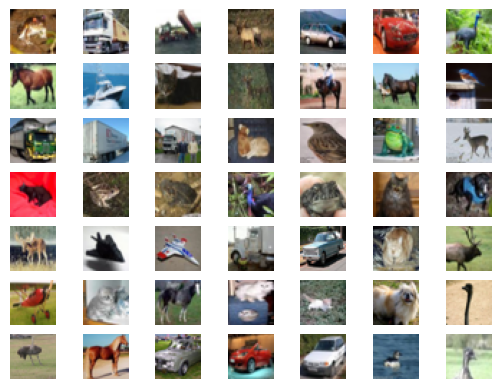

In [ ]:
for i in range(49):
  pyplot.subplot(7,7,i+1)
  pyplot.axis("off")
  pyplot.imshow(x_train[i])
pyplot.show()

In [ ]:
print(x_train.shape)

(50000, 32, 32, 3)


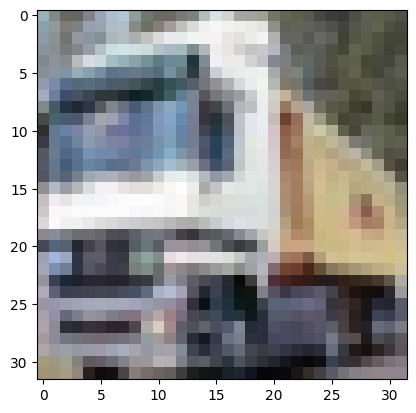

In [ ]:
pyplot.imshow(x_train[1])

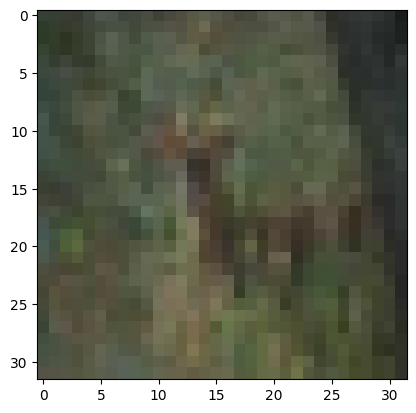

In [ ]:
pyplot.imshow(x_train[10])

In [ ]:
# pip install keras

In [ ]:
# pip install --upgrade keras


In [ ]:
from keras.utils import plot_model


In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Conv2D,Flatten,Dropout,LeakyReLU
# from keras.utils.vis_utils import plot_model
import numpy as np

In [ ]:
def define_discriminator(in_shape=(32,32,3)):
  model = Sequential()

  model.add(Conv2D(64,(3,3), padding = "same" , input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),strides=(2,2), padding = "same" ))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),strides=(2,2), padding = "same" ))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(256,(3,3),strides=(2,2), padding = "same" ))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation = "sigmoid"))

  opt = Adam(lr=0.0002 , beta_1=0.5)
  model.compile(loss="binary_crossentropy", optimizer=opt , metrics=["accuracy"])
  return model

In [ ]:
model = define_discriminator()

model.summary()

# plot_model(model , to_file="")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

In [ ]:
def load_real_samples():
  (x_train,_),(_,_) = load_data()
  x=x_train.astype("float32")

  x = (x-127.5)/127.5

  return x

In [ ]:
x = load_real_samples()

x.shape

(50000, 32, 32, 3)

In [ ]:
x[1]

array([[[ 0.20784314,  0.3882353 ,  0.46666667],
        [-0.01176471,  0.07450981,  0.06666667],
        [-0.1764706 , -0.18431373, -0.25490198],
        ...,
        [-0.28627452, -0.25490198, -0.44313726],
        [-0.31764707, -0.29411766, -0.44313726],
        [-0.38039216, -0.3647059 , -0.4509804 ]],

       [[ 0.09803922,  0.25490198,  0.3254902 ],
        [ 0.13725491,  0.2       ,  0.20784314],
        [-0.01960784, -0.01960784, -0.07450981],
        ...,
        [-0.24705882, -0.22352941, -0.3882353 ],
        [-0.39607844, -0.37254903, -0.5137255 ],
        [-0.44313726, -0.42745098, -0.52156866]],

       [[ 0.09803922,  0.21568628,  0.28627452],
        [ 0.09019608,  0.14509805,  0.16862746],
        [-0.09803922, -0.09803922, -0.12156863],
        ...,
        [-0.38039216, -0.35686275, -0.49803922],
        [-0.46666667, -0.4509804 , -0.5686275 ],
        [-0.4745098 , -0.45882353, -0.5686275 ]],

       ...,

       [[ 0.37254903,  0.30980393,  0.3019608 ],
        [ 0

In [ ]:
# select real samples
def generate_real_samples(dataset , n_samples):
  # choose random instances
  ix = np.random.randint(0,dataset.shape[0], n_samples)

  x = dataset[ix]
  # generate real class labels as 1
  y = np.ones((n_samples, 1))
  return x,y

In [ ]:
x,y = generate_real_samples(x,64)
print(x.shape)
print(y.shape)
print(y)

(64, 32, 32, 3)
(64, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
# generate fake samples with class labels

def generate_fake_samples(n_samples):
  x = np.random.rand(32*32*3*n_samples)
  x=-1 + x*2

  x = x.reshape((n_samples, 32, 32, 3))
  # generate fake class labels as 0
  y = np.zeros((n_samples, 1))

  return x,y

In [ ]:
x, y = generate_fake_samples(64)

In [ ]:
print(x.shape)
print(y.shape)
print(y)

(64, 32, 32, 3)
(64, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


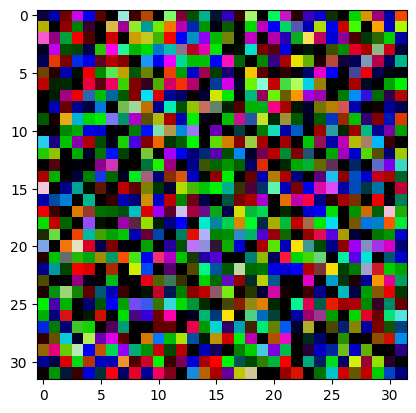

In [ ]:
# noisy image(fake image)
pyplot.imshow(x[0])

In [ ]:
# train the descriminator model temporarily

def train_descriminator(model, dataset, n_iter=20, n_batch=128):
  half_batch = int(n_batch/2)

  for i in range(n_iter):
    # get randomly selected real images
    x_real,y_real = generate_real_samples(dataset, half_batch)
    # update discriminator on real images
    _, real_acc = model.train_on_batch(x_real,y_real)
    # generate fake examples
    x_fake, y_fake = generate_fake_samples(half_batch)
    # update discriminator on fake images
    _, fake_acc = model.train_on_batch(x_fake, y_fake)

    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [ ]:

model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_descriminator(model,dataset)

>1 real=14% fake=0%
>2 real=98% fake=5%
>3 real=89% fake=66%
>4 real=94% fake=100%
>5 real=92% fake=100%
>6 real=98% fake=100%
>7 real=100% fake=100%
>8 real=100% fake=100%
>9 real=100% fake=100%
>10 real=100% fake=100%
>11 real=100% fake=100%
>12 real=100% fake=100%
>13 real=100% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=100% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%


In [ ]:
from keras.layers import Conv2DTranspose ,Reshape

In [ ]:
# define the standalone generator model

def define_generator(latent_dim):
  model = Sequential()
# foundation for 4x4 image
  n_nodes = 256*4*4

  model.add(Dense(n_nodes, input_dim = latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4,4,256)))

  # upsampling to 8x8
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2), padding="same"))
  model.add(LeakyReLU(alpha=0.2))

  # upsampling to 16x16
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2), padding="same"))
  model.add(LeakyReLU(alpha=0.2))

  # upsampling to 32*32
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2), padding="same"))
  model.add(LeakyReLU(alpha=0.2))

  # output layer
  model.add(Conv2D(3,(3,3),activation="tanh", padding="same"))

  return model




In [ ]:
# define the size of tehe latent space
latent_dim = 100

# define the generator model
model = define_generator(latent_dim)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 128)         524416    
 anspose)                                                        
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                           

In [ ]:
# generate points in latent space as input for generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in atent space
  x_input = np.random.randn(latent_dim*n_samples)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)

  return x_input

In [ ]:
x_input = generate_latent_points(100,64)
print(x_input.shape)

(64, 100)


In [ ]:
# use the generator to generate n fake examples , class labels

def generate_fake_samples(g_model, latent_dim, n_samples):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  x = g_model.predict(x_input)
  # create fake labels 0
  y = np.zeros((n_samples,1))
  return x,y

2/2 [==============================] - 1s 113ms/step


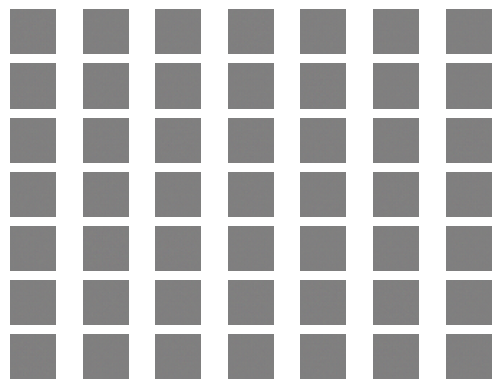

In [ ]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 49
x,_ = generate_fake_samples(model,latent_dim, n_samples)
# scale pixel values from [-1,1] to [0,1]
x = (x+1)/2.0
# plot generated samples
for i in range(n_samples):
  pyplot.subplot(7,7,i+1)
  pyplot.axis("off")
  pyplot.imshow(x[i])
pyplot.show()

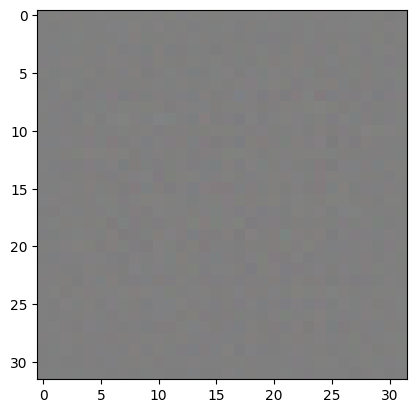

In [ ]:
pyplot.imshow(x[0])

In [ ]:
# define the combined generator and discriminator model
def define_gan(g_model, d_model):
  # make weights in the discriminator not trainable
  d_model.trainable = False
  # connect them
  model = Sequential()
  # add generator
  model.add(g_model)
  # add the discriminator
  model.add(d_model)
  # compile model
  opt = Adam(lr=0.0002, beta_1 = 0.5)
  model.compile(loss="binary_crossentropy",optimizer=opt)
  return model

In [ ]:
# size of latent space
latent_dim=100
# create the discriminator
d_model = define_discriminator()
# create generator
g_model = define_generator(latent_dim)
# create gan
gan_model = define_gan(g_model,d_model)
# summarize gan model
gan_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


In [ ]:
from matplotlib import pyplot
# Train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=10, n_batch=128):
  bat_per_epo = int(dataset.shape[0]/n_batch)
  half_batch = int(n_batch/2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      # get randomly selected "real" samples
      x_real, y_real = generate_real_samples(dataset, half_batch)
      # update discriminator model weights
      d_loss1, _ = d_model.train_on_batch(x_real,y_real)
      # generate fake examples
      x_fake, y_fake = generate_fake_samples(g_model,latent_dim,half_batch)
      # update the discriminator model weights
      d_loss2, _ = d_model.train_on_batch(x_fake,y_fake)
      # prepare points in latent space as input for generator
      x_gan = generate_latent_points(latent_dim, n_batch)
      # create inverted(i.e 1) labels for fake samples
      y_gan = np.ones((n_batch,1))
      # update the generatir via discriminator error
      g_loss = gan_model.train_on_batch(x_gan,y_gan)
      # summarize loss on this batch
      print(">%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f" %(i+1,j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
      # evaluate the model performance sometimes

      if (i+1)%5 == 0:
        summarize_performance(i,g_model,d_model,dataset,latent_dim)



In [ ]:
# evaluate the disciminator , plot generated images save generator model

def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
  # prepare real images
  x_real,y_real = generate_real_samples(dataset,n_samples)
  # evaluate discriminator on real images
  _ , acc_real = d_model.evaluate(x_real,y_real,verbose=0)
  # prepare fake images
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  # evaluate discriminator on fake images
  _ , acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
  # summarize discriminator performance
  print(">Accuracy real: %.0f%%, fake: %.0f%%" %(acc_real*100, acc_fake*100))
  # save plot
  save_plot(x_fake, epoch)
  # save generator model tite file
  filename = "generator_model_%03d.h5" %(epoch+1)
  g_model.save(filename)


In [ ]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
  # scale from [-1,1] to [0,1]
  examples = (examples+1)/2.0
  # plot images
  for i in range(n*n):
    # define subplot
    pyplot.subplot(n,n,1+i)
    # turn off axis
    pyplot.axis("off")
    # plot raw pixel data
    pyplot.imshow(examples[i])
  # save the plot to file
  filename = "generated_plot_e%03d.png" %(epoch+1)
  pyplot.savefig(filename)
  pyplot.close()

In [ ]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=10, n_batch=128)

2/2 [==============================] - 0s 8ms/step
>1, 1/390, d1=0.696, d2=0.710 g=0.689
2/2 [==============================] - 0s 5ms/step
>1, 2/390, d1=0.440, d2=0.808 g=0.666
2/2 [==============================] - 0s 4ms/step
>1, 3/390, d1=0.102, d2=0.922 g=0.838
2/2 [==============================] - 0s 5ms/step
>1, 4/390, d1=0.023, d2=0.655 g=0.858
2/2 [==============================] - 0s 5ms/step
>1, 5/390, d1=0.014, d2=0.736 g=0.795
2/2 [==============================] - 0s 4ms/step
>1, 6/390, d1=0.010, d2=0.674 g=0.841
2/2 [==============================] - 0s 5ms/step
>1, 7/390, d1=0.030, d2=0.659 g=0.938
2/2 [==============================] - 0s 4ms/step
>1, 8/390, d1=0.050, d2=0.788 g=0.974
2/2 [==============================] - 0s 5ms/step
>1, 9/390, d1=0.012, d2=1.672 g=1.335
2/2 [==============================] - 0s 5ms/step
>1, 10/390, d1=0.255, d2=0.378 g=1.661
2/2 [==============================] - 0s 5ms/step
>1, 11/390, d1=0.055, d2=0.205 g=2.498
2/2 [==============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 5ms/step
>5, 2/390, d1=0.664, d2=0.683 g=1.143
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 56%, fake: 85%


2/2 [==============================] - 0s 7ms/step
>5, 3/390, d1=0.644, d2=0.579 g=1.169
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 87%


2/2 [==============================] - 0s 7ms/step
>5, 4/390, d1=0.576, d2=0.514 g=1.204
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 63%, fake: 83%


2/2 [==============================] - 0s 6ms/step
>5, 5/390, d1=0.618, d2=0.574 g=1.193
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 75%, fake: 82%


2/2 [==============================] - 0s 6ms/step
>5, 6/390, d1=0.527, d2=0.582 g=1.251
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 71%, fake: 85%


2/2 [==============================] - 0s 7ms/step
>5, 7/390, d1=0.537, d2=0.609 g=1.212
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 76%, fake: 73%


2/2 [==============================] - 0s 7ms/step
>5, 8/390, d1=0.498, d2=0.583 g=1.252
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 71%, fake: 75%


2/2 [==============================] - 0s 6ms/step
>5, 9/390, d1=0.521, d2=0.634 g=1.375
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 68%, fake: 86%


2/2 [==============================] - 0s 7ms/step
>5, 10/390, d1=0.489, d2=0.629 g=1.552
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 64%, fake: 89%


2/2 [==============================] - 0s 6ms/step
>5, 11/390, d1=0.608, d2=0.609 g=1.521
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 65%, fake: 83%


2/2 [==============================] - 0s 7ms/step
>5, 12/390, d1=0.592, d2=0.623 g=1.413
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 65%, fake: 78%


2/2 [==============================] - 0s 8ms/step
>5, 13/390, d1=0.708, d2=0.654 g=1.063
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 65%, fake: 71%


2/2 [==============================] - 0s 7ms/step
>5, 14/390, d1=0.606, d2=0.686 g=1.195
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 65%, fake: 81%


2/2 [==============================] - 0s 5ms/step
>5, 15/390, d1=0.630, d2=0.595 g=1.078
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 55%, fake: 78%


2/2 [==============================] - 0s 8ms/step
>5, 16/390, d1=0.607, d2=0.684 g=1.179
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 63%, fake: 87%


2/2 [==============================] - 0s 9ms/step
>5, 17/390, d1=0.576, d2=0.573 g=1.243
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 53%, fake: 83%


2/2 [==============================] - 0s 6ms/step
>5, 18/390, d1=0.630, d2=0.679 g=1.337
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 53%, fake: 88%


2/2 [==============================] - 0s 6ms/step
>5, 19/390, d1=0.702, d2=0.562 g=1.541
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 55%, fake: 97%


2/2 [==============================] - 0s 8ms/step
>5, 20/390, d1=0.755, d2=0.375 g=1.472
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 56%, fake: 87%


2/2 [==============================] - 0s 7ms/step
>5, 21/390, d1=0.635, d2=0.483 g=1.362
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 63%, fake: 77%


2/2 [==============================] - 0s 6ms/step
>5, 22/390, d1=0.534, d2=0.624 g=1.488
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 57%, fake: 83%


2/2 [==============================] - 0s 7ms/step
>5, 23/390, d1=0.768, d2=0.722 g=1.381
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 55%, fake: 66%


2/2 [==============================] - 0s 13ms/step
>5, 24/390, d1=0.585, d2=0.694 g=1.475
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 53%, fake: 85%


2/2 [==============================] - 0s 7ms/step
>5, 25/390, d1=0.695, d2=0.497 g=1.533
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 44%, fake: 89%


2/2 [==============================] - 0s 8ms/step
>5, 26/390, d1=0.725, d2=0.475 g=1.309
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 65%, fake: 59%


2/2 [==============================] - 0s 6ms/step
>5, 27/390, d1=0.551, d2=0.920 g=1.098
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 61%, fake: 66%


2/2 [==============================] - 0s 10ms/step
>5, 28/390, d1=0.680, d2=0.659 g=1.301
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 55%, fake: 74%


2/2 [==============================] - 0s 6ms/step
>5, 29/390, d1=0.661, d2=0.655 g=1.271
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 66%, fake: 75%


2/2 [==============================] - 0s 7ms/step
>5, 30/390, d1=0.595, d2=0.628 g=1.467
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 45%, fake: 89%


2/2 [==============================] - 0s 7ms/step
>5, 31/390, d1=0.836, d2=0.443 g=1.419
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 63%, fake: 88%


2/2 [==============================] - 0s 4ms/step
>5, 32/390, d1=0.592, d2=0.578 g=1.339
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 77%, fake: 87%


2/2 [==============================] - 0s 8ms/step
>5, 33/390, d1=0.447, d2=0.625 g=1.351
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 70%, fake: 75%


2/2 [==============================] - 0s 7ms/step
>5, 34/390, d1=0.372, d2=0.660 g=1.315
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 75%, fake: 77%


2/2 [==============================] - 0s 7ms/step
>5, 35/390, d1=0.458, d2=0.680 g=1.261
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 72%, fake: 79%


2/2 [==============================] - 0s 8ms/step
>5, 36/390, d1=0.618, d2=0.694 g=1.232
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 68%, fake: 66%


2/2 [==============================] - 0s 8ms/step
>5, 37/390, d1=0.647, d2=0.829 g=1.240
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 56%, fake: 83%


2/2 [==============================] - 0s 6ms/step
>5, 38/390, d1=0.636, d2=0.550 g=1.324
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 53%, fake: 86%


2/2 [==============================] - 0s 7ms/step
>5, 39/390, d1=0.714, d2=0.604 g=1.477
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 44%, fake: 93%


2/2 [==============================] - 0s 7ms/step
>5, 40/390, d1=0.734, d2=0.501 g=1.508
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 47%, fake: 91%


2/2 [==============================] - 0s 7ms/step
>5, 41/390, d1=0.729, d2=0.555 g=1.437
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 50%, fake: 89%


2/2 [==============================] - 0s 6ms/step
>5, 42/390, d1=0.716, d2=0.520 g=1.417
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 45%, fake: 88%


2/2 [==============================] - 0s 6ms/step
>5, 43/390, d1=0.686, d2=0.495 g=1.250
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 59%, fake: 71%


2/2 [==============================] - 0s 6ms/step
>5, 44/390, d1=0.628, d2=0.659 g=1.238
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 65%, fake: 69%


2/2 [==============================] - 0s 8ms/step
>5, 45/390, d1=0.610, d2=0.636 g=1.262
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 65%, fake: 77%


2/2 [==============================] - 0s 8ms/step
>5, 46/390, d1=0.644, d2=0.604 g=1.260
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 67%, fake: 71%


2/2 [==============================] - 0s 7ms/step
>5, 47/390, d1=0.532, d2=0.692 g=1.303
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 62%, fake: 75%


2/2 [==============================] - 0s 7ms/step
>5, 48/390, d1=0.655, d2=0.618 g=1.307
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 65%, fake: 82%


2/2 [==============================] - 0s 6ms/step
>5, 49/390, d1=0.556, d2=0.570 g=1.370
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 64%, fake: 76%


2/2 [==============================] - 0s 8ms/step
>5, 50/390, d1=0.591, d2=0.649 g=1.354
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 67%, fake: 83%


2/2 [==============================] - 0s 7ms/step
>5, 51/390, d1=0.637, d2=0.612 g=1.419
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 61%, fake: 83%


2/2 [==============================] - 0s 5ms/step
>5, 52/390, d1=0.455, d2=0.782 g=1.384
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 53%, fake: 68%


2/2 [==============================] - 0s 7ms/step
>5, 53/390, d1=0.724, d2=1.505 g=1.614
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 97%


2/2 [==============================] - 0s 7ms/step
>5, 54/390, d1=0.811, d2=1.247 g=1.135
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 63%, fake: 43%


2/2 [==============================] - 0s 7ms/step
>5, 55/390, d1=0.626, d2=3.943 g=1.562
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 27%, fake: 100%


2/2 [==============================] - 0s 8ms/step
>5, 56/390, d1=1.032, d2=0.583 g=1.099
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 57%, fake: 84%


2/2 [==============================] - 0s 7ms/step
>5, 57/390, d1=0.728, d2=0.686 g=1.220
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 34%, fake: 99%


2/2 [==============================] - 0s 7ms/step
>5, 58/390, d1=0.720, d2=0.489 g=1.348
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 87%


2/2 [==============================] - 0s 9ms/step
>5, 59/390, d1=0.767, d2=0.522 g=1.215
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 57%, fake: 78%


2/2 [==============================] - 0s 7ms/step
>5, 60/390, d1=0.619, d2=0.668 g=1.081
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 60%, fake: 52%


2/2 [==============================] - 0s 6ms/step
>5, 61/390, d1=0.733, d2=0.979 g=0.971
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 54%, fake: 21%


2/2 [==============================] - 0s 6ms/step
>5, 62/390, d1=0.764, d2=1.510 g=0.971
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 47%, fake: 74%


2/2 [==============================] - 0s 7ms/step
>5, 63/390, d1=0.746, d2=0.621 g=1.162
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 60%, fake: 74%


2/2 [==============================] - 0s 9ms/step
>5, 64/390, d1=0.634, d2=0.734 g=0.827
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 67%, fake: 53%


2/2 [==============================] - 0s 6ms/step
>5, 65/390, d1=0.631, d2=0.819 g=0.784
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 78%, fake: 45%


2/2 [==============================] - 0s 9ms/step
>5, 66/390, d1=0.528, d2=0.777 g=0.796
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 82%, fake: 47%


2/2 [==============================] - 0s 9ms/step
>5, 67/390, d1=0.495, d2=0.805 g=0.814
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 75%, fake: 55%


2/2 [==============================] - 0s 8ms/step
>5, 68/390, d1=0.509, d2=0.826 g=0.884
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 70%, fake: 71%


2/2 [==============================] - 0s 8ms/step
>5, 69/390, d1=0.556, d2=0.732 g=0.953
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 57%, fake: 73%


2/2 [==============================] - 0s 11ms/step
>5, 70/390, d1=0.604, d2=0.726 g=1.023
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 54%, fake: 79%


2/2 [==============================] - 0s 7ms/step
>5, 71/390, d1=0.733, d2=0.737 g=1.132
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 45%, fake: 86%


2/2 [==============================] - 0s 8ms/step
>5, 72/390, d1=0.796, d2=0.700 g=1.045
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 49%, fake: 76%


2/2 [==============================] - 0s 6ms/step
>5, 73/390, d1=0.707, d2=0.703 g=1.136
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 43%, fake: 86%


2/2 [==============================] - 0s 7ms/step
>5, 74/390, d1=0.767, d2=0.617 g=1.170
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 37%, fake: 93%


2/2 [==============================] - 0s 8ms/step
>5, 75/390, d1=0.803, d2=0.567 g=1.227
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 43%, fake: 93%


2/2 [==============================] - 0s 8ms/step
>5, 76/390, d1=0.737, d2=0.628 g=1.270
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 95%


2/2 [==============================] - 0s 9ms/step
>5, 77/390, d1=0.688, d2=0.557 g=1.242
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 45%, fake: 92%


2/2 [==============================] - 0s 7ms/step
>5, 78/390, d1=0.726, d2=0.605 g=1.058
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 62%, fake: 84%


2/2 [==============================] - 0s 7ms/step
>5, 79/390, d1=0.675, d2=0.678 g=1.018
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 67%, fake: 85%


2/2 [==============================] - 0s 7ms/step
>5, 80/390, d1=0.643, d2=0.630 g=1.046
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 63%, fake: 79%


2/2 [==============================] - 0s 8ms/step
>5, 81/390, d1=0.595, d2=0.665 g=1.023
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 62%, fake: 79%


2/2 [==============================] - 0s 7ms/step
>5, 82/390, d1=0.609, d2=0.670 g=0.970
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 68%, fake: 67%


2/2 [==============================] - 0s 6ms/step
>5, 83/390, d1=0.636, d2=0.794 g=1.060
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 57%, fake: 67%


2/2 [==============================] - 0s 7ms/step
>5, 84/390, d1=0.640, d2=0.685 g=0.993
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 59%, fake: 70%


2/2 [==============================] - 0s 8ms/step
>5, 85/390, d1=0.665, d2=0.703 g=0.956
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 57%, fake: 67%


2/2 [==============================] - 0s 9ms/step
>5, 86/390, d1=0.632, d2=0.747 g=0.976
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 65%, fake: 69%


2/2 [==============================] - 0s 7ms/step
>5, 87/390, d1=0.550, d2=0.727 g=1.100
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 63%, fake: 84%


2/2 [==============================] - 0s 8ms/step
>5, 88/390, d1=0.682, d2=0.638 g=1.193
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 77%


2/2 [==============================] - 0s 7ms/step
>5, 89/390, d1=0.667, d2=0.646 g=1.201
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 51%, fake: 81%


2/2 [==============================] - 0s 8ms/step
>5, 90/390, d1=0.658, d2=0.679 g=1.235
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 50%, fake: 81%


2/2 [==============================] - 0s 8ms/step
>5, 91/390, d1=0.650, d2=0.616 g=1.169
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 43%, fake: 71%


2/2 [==============================] - 0s 6ms/step
>5, 92/390, d1=0.788, d2=0.690 g=1.055
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 44%, fake: 79%


2/2 [==============================] - 0s 8ms/step
>5, 93/390, d1=0.701, d2=0.647 g=1.097
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 45%, fake: 71%


2/2 [==============================] - 0s 8ms/step
>5, 94/390, d1=0.766, d2=0.633 g=1.079
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 54%, fake: 77%


2/2 [==============================] - 0s 7ms/step
>5, 95/390, d1=0.677, d2=0.682 g=1.133
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 52%, fake: 82%


2/2 [==============================] - 0s 6ms/step
>5, 96/390, d1=0.713, d2=0.627 g=1.120
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 61%, fake: 87%


2/2 [==============================] - 0s 9ms/step
>5, 97/390, d1=0.562, d2=0.580 g=1.094
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 54%, fake: 81%


2/2 [==============================] - 0s 7ms/step
>5, 98/390, d1=0.547, d2=0.621 g=1.101
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 51%, fake: 66%


2/2 [==============================] - 0s 5ms/step
>5, 99/390, d1=0.682, d2=0.713 g=1.040
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 47%, fake: 66%


2/2 [==============================] - 0s 8ms/step
>5, 100/390, d1=0.709, d2=0.771 g=1.057
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 91%


2/2 [==============================] - 0s 10ms/step
>5, 101/390, d1=0.764, d2=0.567 g=1.030
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 83%


2/2 [==============================] - 0s 8ms/step
>5, 102/390, d1=0.619, d2=0.615 g=1.026
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 61%, fake: 85%


2/2 [==============================] - 0s 8ms/step
>5, 103/390, d1=0.627, d2=0.650 g=1.028
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 68%, fake: 78%


2/2 [==============================] - 0s 8ms/step
>5, 104/390, d1=0.580, d2=0.786 g=1.124
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 59%, fake: 82%


2/2 [==============================] - 0s 8ms/step
>5, 105/390, d1=0.672, d2=0.597 g=1.139
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 88%


2/2 [==============================] - 0s 7ms/step
>5, 106/390, d1=0.654, d2=0.561 g=1.185
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 61%, fake: 77%


2/2 [==============================] - 0s 7ms/step
>5, 107/390, d1=0.626, d2=0.616 g=1.163
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 61%, fake: 73%


2/2 [==============================] - 0s 6ms/step
>5, 108/390, d1=0.684, d2=0.705 g=1.132
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 63%, fake: 71%


2/2 [==============================] - 0s 10ms/step
>5, 109/390, d1=0.586, d2=0.698 g=1.115
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 64%, fake: 80%


2/2 [==============================] - 0s 7ms/step
>5, 110/390, d1=0.595, d2=0.622 g=1.177
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 61%, fake: 79%


2/2 [==============================] - 0s 8ms/step
>5, 111/390, d1=0.636, d2=0.617 g=1.210
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 52%, fake: 65%


2/2 [==============================] - 0s 7ms/step
>5, 112/390, d1=0.668, d2=0.623 g=1.178
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 67%


2/2 [==============================] - 0s 7ms/step
>5, 113/390, d1=0.746, d2=0.706 g=1.154
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 55%, fake: 79%


2/2 [==============================] - 0s 8ms/step
>5, 114/390, d1=0.663, d2=0.622 g=1.249
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 49%, fake: 87%


2/2 [==============================] - 0s 12ms/step
>5, 115/390, d1=0.691, d2=0.588 g=1.330
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 55%, fake: 89%


2/2 [==============================] - 0s 9ms/step
>5, 116/390, d1=0.701, d2=0.516 g=1.278
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 59%, fake: 85%


2/2 [==============================] - 0s 13ms/step
>5, 117/390, d1=0.653, d2=0.619 g=1.064
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 61%, fake: 85%


2/2 [==============================] - 0s 6ms/step
>5, 118/390, d1=0.632, d2=0.670 g=1.131
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 69%, fake: 77%


2/2 [==============================] - 0s 5ms/step
>5, 119/390, d1=0.669, d2=0.688 g=1.177
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 54%, fake: 77%


2/2 [==============================] - 0s 7ms/step
>5, 120/390, d1=0.730, d2=0.664 g=1.159
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 82%


2/2 [==============================] - 0s 9ms/step
>5, 121/390, d1=0.661, d2=0.582 g=1.243
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 56%, fake: 83%


2/2 [==============================] - 0s 9ms/step
>5, 122/390, d1=0.745, d2=0.585 g=1.188
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 49%, fake: 85%


2/2 [==============================] - 0s 8ms/step
>5, 123/390, d1=0.707, d2=0.659 g=1.221
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 43%, fake: 87%


2/2 [==============================] - 0s 8ms/step
>5, 124/390, d1=0.628, d2=0.579 g=1.207
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 91%


2/2 [==============================] - 0s 6ms/step
>5, 125/390, d1=0.743, d2=0.609 g=1.287
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 53%, fake: 84%


2/2 [==============================] - 0s 7ms/step
>5, 126/390, d1=0.713, d2=0.651 g=1.424
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 45%, fake: 92%


2/2 [==============================] - 0s 8ms/step
>5, 127/390, d1=0.700, d2=0.536 g=1.393
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 52%, fake: 90%


2/2 [==============================] - 0s 7ms/step
>5, 128/390, d1=0.646, d2=0.547 g=1.396
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 56%, fake: 93%


2/2 [==============================] - 0s 6ms/step
>5, 129/390, d1=0.663, d2=0.593 g=1.426
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 55%, fake: 84%


2/2 [==============================] - 0s 7ms/step
>5, 130/390, d1=0.643, d2=0.567 g=1.407
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 56%, fake: 83%


2/2 [==============================] - 0s 8ms/step
>5, 131/390, d1=0.659, d2=0.696 g=1.446
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 52%, fake: 68%


2/2 [==============================] - 0s 11ms/step
>5, 132/390, d1=0.623, d2=0.658 g=1.210
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 57%, fake: 57%


2/2 [==============================] - 0s 6ms/step
>5, 133/390, d1=0.662, d2=0.881 g=1.182
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 74%


2/2 [==============================] - 0s 8ms/step
>5, 134/390, d1=0.751, d2=0.673 g=1.185
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 50%, fake: 89%


2/2 [==============================] - 0s 9ms/step
>5, 135/390, d1=0.770, d2=0.550 g=1.127
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 79%


2/2 [==============================] - 0s 9ms/step
>5, 136/390, d1=0.580, d2=0.764 g=1.233
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 59%, fake: 77%


2/2 [==============================] - 0s 6ms/step
>5, 137/390, d1=0.550, d2=0.511 g=1.411
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 67%, fake: 87%


2/2 [==============================] - 0s 7ms/step
>5, 138/390, d1=0.515, d2=0.484 g=1.512
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 75%, fake: 77%


2/2 [==============================] - 0s 9ms/step
>5, 139/390, d1=0.537, d2=0.511 g=1.533
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 72%, fake: 69%


2/2 [==============================] - 0s 9ms/step
>5, 140/390, d1=0.456, d2=0.586 g=1.538
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 59%, fake: 85%


2/2 [==============================] - 0s 5ms/step
>5, 141/390, d1=0.540, d2=0.611 g=1.820
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 58%, fake: 96%


2/2 [==============================] - 0s 5ms/step
>5, 142/390, d1=0.696, d2=0.451 g=1.901
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 56%, fake: 88%


2/2 [==============================] - 0s 6ms/step
>5, 143/390, d1=0.680, d2=0.650 g=1.689
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 51%, fake: 88%


2/2 [==============================] - 0s 7ms/step
>5, 144/390, d1=0.705, d2=0.556 g=1.447
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 50%, fake: 79%


2/2 [==============================] - 0s 5ms/step
>5, 145/390, d1=0.733, d2=0.663 g=1.327
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 51%, fake: 65%


2/2 [==============================] - 0s 9ms/step
>5, 146/390, d1=0.753, d2=0.681 g=1.215
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 55%, fake: 82%


2/2 [==============================] - 0s 6ms/step
>5, 147/390, d1=0.767, d2=0.771 g=1.325
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 59%, fake: 91%


2/2 [==============================] - 0s 8ms/step
>5, 148/390, d1=0.681, d2=0.490 g=1.223
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 66%, fake: 81%


2/2 [==============================] - 0s 9ms/step
>5, 149/390, d1=0.578, d2=0.756 g=1.129
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 74%, fake: 67%


2/2 [==============================] - 0s 8ms/step
>5, 150/390, d1=0.565, d2=0.920 g=1.330
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 66%, fake: 89%


2/2 [==============================] - 0s 8ms/step
>5, 151/390, d1=0.611, d2=0.462 g=1.336
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 63%, fake: 72%


2/2 [==============================] - 0s 8ms/step
>5, 152/390, d1=0.521, d2=0.705 g=1.303
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 67%, fake: 70%


2/2 [==============================] - 0s 9ms/step
>5, 153/390, d1=0.613, d2=0.677 g=1.431
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 74%


2/2 [==============================] - 0s 10ms/step
>5, 154/390, d1=0.696, d2=0.561 g=1.497
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 47%, fake: 75%


2/2 [==============================] - 0s 11ms/step
>5, 155/390, d1=0.704, d2=0.661 g=1.613
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 35%, fake: 88%


2/2 [==============================] - 0s 8ms/step
>5, 156/390, d1=0.921, d2=0.503 g=1.492
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 39%, fake: 85%


2/2 [==============================] - 0s 8ms/step
>5, 157/390, d1=0.794, d2=0.521 g=1.434
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 42%, fake: 95%


2/2 [==============================] - 0s 9ms/step
>5, 158/390, d1=0.770, d2=0.418 g=1.407
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 44%, fake: 94%


2/2 [==============================] - 0s 9ms/step
>5, 159/390, d1=0.731, d2=0.504 g=1.413
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 57%, fake: 90%


2/2 [==============================] - 0s 6ms/step
>5, 160/390, d1=0.671, d2=0.547 g=1.336
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 68%, fake: 90%


2/2 [==============================] - 0s 6ms/step
>5, 161/390, d1=0.477, d2=0.515 g=1.333
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 73%, fake: 76%


2/2 [==============================] - 0s 7ms/step
>5, 162/390, d1=0.472, d2=0.706 g=1.358
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 65%, fake: 62%


2/2 [==============================] - 0s 6ms/step
>5, 163/390, d1=0.606, d2=1.007 g=1.419
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 45%


2/2 [==============================] - 0s 8ms/step
>5, 164/390, d1=0.758, d2=0.881 g=1.469
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 47%, fake: 39%


2/2 [==============================] - 0s 7ms/step
>5, 165/390, d1=0.912, d2=1.101 g=1.952
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 47%, fake: 97%


2/2 [==============================] - 0s 9ms/step
>5, 166/390, d1=0.704, d2=0.275 g=2.199
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 68%, fake: 61%


2/2 [==============================] - 0s 9ms/step
>5, 167/390, d1=0.565, d2=1.024 g=1.003
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 65%


2/2 [==============================] - 0s 7ms/step
>5, 168/390, d1=0.588, d2=0.907 g=0.989
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 80%


2/2 [==============================] - 0s 6ms/step
>5, 169/390, d1=0.725, d2=0.560 g=1.123
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 47%, fake: 95%


2/2 [==============================] - 0s 8ms/step
>5, 170/390, d1=0.782, d2=0.567 g=1.098
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 51%, fake: 92%


2/2 [==============================] - 0s 11ms/step
>5, 171/390, d1=0.683, d2=0.588 g=1.180
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 93%


2/2 [==============================] - 0s 6ms/step
>5, 172/390, d1=0.638, d2=0.577 g=1.235
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 44%, fake: 93%


2/2 [==============================] - 0s 9ms/step
>5, 173/390, d1=0.647, d2=0.557 g=1.194
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 47%, fake: 79%


2/2 [==============================] - 0s 10ms/step
>5, 174/390, d1=0.716, d2=0.639 g=1.018
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 53%, fake: 55%


2/2 [==============================] - 0s 8ms/step
>5, 175/390, d1=0.754, d2=0.678 g=0.941
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 53%, fake: 47%


2/2 [==============================] - 0s 8ms/step
>5, 176/390, d1=0.686, d2=0.745 g=1.198
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 83%


2/2 [==============================] - 0s 6ms/step
>5, 177/390, d1=0.678, d2=0.491 g=1.302
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 85%


2/2 [==============================] - 0s 8ms/step
>5, 178/390, d1=0.628, d2=0.562 g=1.151
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 64%, fake: 85%


2/2 [==============================] - 0s 7ms/step
>5, 179/390, d1=0.601, d2=0.540 g=1.122
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 64%, fake: 66%


2/2 [==============================] - 0s 9ms/step
>5, 180/390, d1=0.583, d2=0.631 g=1.166
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 60%, fake: 70%


2/2 [==============================] - 0s 6ms/step
>5, 181/390, d1=0.613, d2=0.608 g=1.465
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 65%, fake: 81%


2/2 [==============================] - 0s 8ms/step
>5, 182/390, d1=0.640, d2=0.593 g=1.256
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 67%, fake: 46%


2/2 [==============================] - 0s 7ms/step
>5, 183/390, d1=0.579, d2=0.806 g=1.148
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 59%, fake: 59%


2/2 [==============================] - 0s 10ms/step
>5, 184/390, d1=0.665, d2=0.618 g=1.278
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 47%, fake: 85%


2/2 [==============================] - 0s 6ms/step
>5, 185/390, d1=0.673, d2=0.535 g=1.451
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 41%, fake: 93%


2/2 [==============================] - 0s 7ms/step
>5, 186/390, d1=0.792, d2=0.508 g=1.545
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 47%, fake: 82%


2/2 [==============================] - 0s 14ms/step
>5, 187/390, d1=0.719, d2=0.608 g=1.512
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 50%, fake: 82%


2/2 [==============================] - 0s 6ms/step
>5, 188/390, d1=0.743, d2=0.637 g=1.361
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 57%, fake: 81%


2/2 [==============================] - 0s 9ms/step
>5, 189/390, d1=0.642, d2=0.686 g=1.256
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 60%, fake: 83%


2/2 [==============================] - 0s 6ms/step
>5, 190/390, d1=0.657, d2=0.633 g=1.158
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 67%, fake: 79%


2/2 [==============================] - 0s 10ms/step
>5, 191/390, d1=0.593, d2=0.615 g=1.102
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 65%, fake: 92%


2/2 [==============================] - 0s 7ms/step
>5, 192/390, d1=0.531, d2=0.534 g=1.215
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 73%, fake: 87%


2/2 [==============================] - 0s 7ms/step
>5, 193/390, d1=0.520, d2=0.558 g=1.286
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 77%, fake: 91%


2/2 [==============================] - 0s 6ms/step
>5, 194/390, d1=0.542, d2=0.575 g=1.257
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 72%, fake: 68%


2/2 [==============================] - 0s 8ms/step
>5, 195/390, d1=0.351, d2=0.604 g=1.375
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 69%, fake: 55%


2/2 [==============================] - 0s 9ms/step
>5, 196/390, d1=0.504, d2=0.735 g=1.470
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 53%, fake: 63%


2/2 [==============================] - 0s 6ms/step
>5, 197/390, d1=0.669, d2=0.631 g=1.701
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 33%, fake: 89%


2/2 [==============================] - 0s 6ms/step
>5, 198/390, d1=0.906, d2=0.319 g=1.783
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 48%, fake: 87%


2/2 [==============================] - 0s 8ms/step
>5, 199/390, d1=0.729, d2=0.494 g=2.088
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 93%


2/2 [==============================] - 0s 9ms/step
>5, 200/390, d1=0.762, d2=0.349 g=1.924
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 59%, fake: 79%


2/2 [==============================] - 0s 7ms/step
>5, 201/390, d1=0.544, d2=0.552 g=1.870
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 63%, fake: 86%


2/2 [==============================] - 0s 7ms/step
>5, 202/390, d1=0.677, d2=0.551 g=1.713
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 73%, fake: 63%


2/2 [==============================] - 0s 8ms/step
>5, 203/390, d1=0.496, d2=0.735 g=1.721
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 57%, fake: 83%


2/2 [==============================] - 0s 9ms/step
>5, 204/390, d1=0.612, d2=0.518 g=1.394
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 69%, fake: 87%


2/2 [==============================] - 0s 10ms/step
>5, 205/390, d1=0.636, d2=0.575 g=1.245
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 81%, fake: 68%


2/2 [==============================] - 0s 8ms/step
>5, 206/390, d1=0.557, d2=0.711 g=1.260
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 77%, fake: 60%


2/2 [==============================] - 0s 8ms/step
>5, 207/390, d1=0.462, d2=0.641 g=1.495
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 75%, fake: 89%


2/2 [==============================] - 0s 8ms/step
>5, 208/390, d1=0.600, d2=0.514 g=1.667
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 66%, fake: 70%


2/2 [==============================] - 0s 8ms/step
>5, 209/390, d1=0.517, d2=0.608 g=1.620
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 73%, fake: 61%


2/2 [==============================] - 0s 10ms/step
>5, 210/390, d1=0.663, d2=0.721 g=1.754
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 76%, fake: 81%


2/2 [==============================] - 0s 10ms/step
>5, 211/390, d1=0.531, d2=0.429 g=2.269
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 72%, fake: 98%


2/2 [==============================] - 0s 9ms/step
>5, 212/390, d1=0.467, d2=0.361 g=2.317
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 85%, fake: 56%


2/2 [==============================] - 0s 8ms/step
>5, 213/390, d1=0.391, d2=1.164 g=2.075
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 56%, fake: 54%


2/2 [==============================] - 0s 6ms/step
>5, 214/390, d1=0.857, d2=1.652 g=1.557
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 30%, fake: 75%


2/2 [==============================] - 0s 10ms/step
>5, 215/390, d1=1.399, d2=0.907 g=1.158
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 74%


2/2 [==============================] - 0s 8ms/step
>5, 216/390, d1=0.754, d2=0.602 g=1.277
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 47%, fake: 83%


2/2 [==============================] - 0s 9ms/step
>5, 217/390, d1=0.808, d2=0.492 g=1.314
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 50%, fake: 87%


2/2 [==============================] - 0s 10ms/step
>5, 218/390, d1=0.675, d2=0.491 g=1.231
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 62%, fake: 85%


2/2 [==============================] - 0s 9ms/step
>5, 219/390, d1=0.633, d2=0.516 g=1.290
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 67%, fake: 73%


2/2 [==============================] - 0s 5ms/step
>5, 220/390, d1=0.567, d2=0.657 g=1.246
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 63%, fake: 82%


2/2 [==============================] - 0s 9ms/step
>5, 221/390, d1=0.648, d2=0.560 g=1.143
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 64%, fake: 73%


2/2 [==============================] - 0s 8ms/step
>5, 222/390, d1=0.664, d2=0.674 g=1.222
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 65%, fake: 86%


2/2 [==============================] - 0s 6ms/step
>5, 223/390, d1=0.572, d2=0.517 g=1.394
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 56%, fake: 85%


2/2 [==============================] - 0s 12ms/step
>5, 224/390, d1=0.645, d2=0.513 g=1.599
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 62%, fake: 73%


2/2 [==============================] - 0s 10ms/step
>5, 225/390, d1=0.756, d2=0.569 g=1.418
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 56%, fake: 39%


2/2 [==============================] - 0s 8ms/step
>5, 226/390, d1=0.709, d2=0.779 g=1.330
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 51%, fake: 30%


2/2 [==============================] - 0s 11ms/step
>5, 227/390, d1=0.875, d2=0.790 g=1.334
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 57%


2/2 [==============================] - 0s 7ms/step
>5, 228/390, d1=0.724, d2=0.629 g=1.347
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 57%, fake: 83%


2/2 [==============================] - 0s 8ms/step
>5, 229/390, d1=0.663, d2=0.522 g=1.419
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 77%, fake: 81%


2/2 [==============================] - 0s 8ms/step
>5, 230/390, d1=0.562, d2=0.582 g=1.285
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 83%, fake: 27%


2/2 [==============================] - 0s 9ms/step
>5, 231/390, d1=0.437, d2=0.984 g=1.323
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 57%, fake: 69%


2/2 [==============================] - 0s 5ms/step
>5, 232/390, d1=0.704, d2=0.636 g=1.083
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 59%, fake: 61%


2/2 [==============================] - 0s 6ms/step
>5, 233/390, d1=0.586, d2=0.840 g=1.048
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 53%, fake: 83%


2/2 [==============================] - 0s 9ms/step
>5, 234/390, d1=0.676, d2=0.624 g=1.019
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 82%


2/2 [==============================] - 0s 9ms/step
>5, 235/390, d1=0.638, d2=0.591 g=1.043
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 67%, fake: 81%


2/2 [==============================] - 0s 7ms/step
>5, 236/390, d1=0.617, d2=0.692 g=1.121
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 63%, fake: 84%


2/2 [==============================] - 0s 5ms/step
>5, 237/390, d1=0.614, d2=0.638 g=1.236
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 54%, fake: 86%


2/2 [==============================] - 0s 5ms/step
>5, 238/390, d1=0.587, d2=0.558 g=1.211
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 45%, fake: 87%


2/2 [==============================] - 0s 8ms/step
>5, 239/390, d1=0.694, d2=0.623 g=1.230
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 53%, fake: 83%


2/2 [==============================] - 0s 9ms/step
>5, 240/390, d1=0.632, d2=0.718 g=1.341
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 39%, fake: 81%


2/2 [==============================] - 0s 10ms/step
>5, 241/390, d1=0.793, d2=0.729 g=1.384
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 44%, fake: 89%


2/2 [==============================] - 0s 7ms/step
>5, 242/390, d1=0.668, d2=0.498 g=1.412
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 84%


2/2 [==============================] - 0s 6ms/step
>5, 243/390, d1=0.714, d2=0.587 g=1.210
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 59%, fake: 72%


2/2 [==============================] - 0s 10ms/step
>5, 244/390, d1=0.664, d2=0.684 g=1.229
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 59%, fake: 63%


2/2 [==============================] - 0s 9ms/step
>5, 245/390, d1=0.761, d2=0.679 g=1.255
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 52%, fake: 77%


2/2 [==============================] - 0s 8ms/step
>5, 246/390, d1=0.684, d2=0.651 g=1.307
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 57%, fake: 81%


2/2 [==============================] - 0s 6ms/step
>5, 247/390, d1=0.654, d2=0.622 g=1.272
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 63%, fake: 81%


2/2 [==============================] - 0s 10ms/step
>5, 248/390, d1=0.608, d2=0.595 g=1.331
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 61%, fake: 87%


2/2 [==============================] - 0s 9ms/step
>5, 249/390, d1=0.660, d2=0.551 g=1.198
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 69%, fake: 82%


2/2 [==============================] - 0s 10ms/step
>5, 250/390, d1=0.526, d2=0.575 g=1.150
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 71%, fake: 79%


2/2 [==============================] - 0s 6ms/step
>5, 251/390, d1=0.518, d2=0.778 g=1.113
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 71%, fake: 61%


2/2 [==============================] - 0s 7ms/step
>5, 252/390, d1=0.483, d2=0.790 g=1.160
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 63%, fake: 69%


2/2 [==============================] - 0s 9ms/step
>5, 253/390, d1=0.618, d2=0.632 g=1.206
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 67%, fake: 83%


2/2 [==============================] - 0s 6ms/step
>5, 254/390, d1=0.673, d2=0.566 g=1.127
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 61%, fake: 83%


2/2 [==============================] - 0s 6ms/step
>5, 255/390, d1=0.644, d2=0.582 g=1.157
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 65%, fake: 64%


2/2 [==============================] - 0s 9ms/step
>5, 256/390, d1=0.599, d2=0.729 g=1.183
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 58%, fake: 70%


2/2 [==============================] - 0s 7ms/step
>5, 257/390, d1=0.596, d2=0.651 g=1.295
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 63%, fake: 72%


2/2 [==============================] - 0s 10ms/step
>5, 258/390, d1=0.639, d2=0.716 g=1.603
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 59%, fake: 93%


2/2 [==============================] - 0s 9ms/step
>5, 259/390, d1=0.749, d2=0.515 g=1.889
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 47%, fake: 85%


2/2 [==============================] - 0s 10ms/step
>5, 260/390, d1=0.780, d2=0.637 g=1.550
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 37%, fake: 78%


2/2 [==============================] - 0s 9ms/step
>5, 261/390, d1=0.700, d2=0.591 g=1.366
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 56%, fake: 70%


2/2 [==============================] - 0s 9ms/step
>5, 262/390, d1=0.730, d2=2.134 g=1.961
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 31%, fake: 72%


2/2 [==============================] - 0s 9ms/step
>5, 263/390, d1=1.168, d2=1.122 g=1.454
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 18%, fake: 87%


2/2 [==============================] - 0s 6ms/step
>5, 264/390, d1=1.046, d2=0.490 g=1.092
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 49%, fake: 81%


2/2 [==============================] - 0s 9ms/step
>5, 265/390, d1=0.780, d2=0.662 g=0.909
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 66%, fake: 57%


2/2 [==============================] - 0s 6ms/step
>5, 266/390, d1=0.567, d2=0.811 g=0.962
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 70%, fake: 67%


2/2 [==============================] - 0s 7ms/step
>5, 267/390, d1=0.555, d2=0.799 g=1.176
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 59%, fake: 89%


2/2 [==============================] - 0s 8ms/step
>5, 268/390, d1=0.713, d2=0.526 g=1.301
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 53%, fake: 88%


2/2 [==============================] - 0s 9ms/step
>5, 269/390, d1=0.672, d2=0.587 g=1.228
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 89%


2/2 [==============================] - 0s 10ms/step
>5, 270/390, d1=0.709, d2=0.577 g=1.185
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 47%, fake: 88%


2/2 [==============================] - 0s 5ms/step
>5, 271/390, d1=0.761, d2=0.609 g=1.127
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 85%


2/2 [==============================] - 0s 7ms/step
>5, 272/390, d1=0.730, d2=0.569 g=1.123
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 54%, fake: 79%


2/2 [==============================] - 0s 6ms/step
>5, 273/390, d1=0.724, d2=0.642 g=1.062
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 52%, fake: 84%


2/2 [==============================] - 0s 8ms/step
>5, 274/390, d1=0.756, d2=0.651 g=1.055
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 74%


2/2 [==============================] - 0s 15ms/step
>5, 275/390, d1=0.624, d2=0.712 g=1.122
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 59%, fake: 76%


2/2 [==============================] - 0s 10ms/step
>5, 276/390, d1=0.736, d2=0.664 g=1.112
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 43%, fake: 77%


2/2 [==============================] - 0s 11ms/step
>5, 277/390, d1=0.638, d2=0.719 g=1.163
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 44%, fake: 78%


2/2 [==============================] - 0s 8ms/step
>5, 278/390, d1=0.713, d2=0.587 g=1.157
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 45%, fake: 81%


2/2 [==============================] - 0s 9ms/step
>5, 279/390, d1=0.637, d2=0.613 g=1.117
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 55%, fake: 78%


2/2 [==============================] - 0s 6ms/step
>5, 280/390, d1=0.684, d2=0.677 g=1.186
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 67%


2/2 [==============================] - 0s 6ms/step
>5, 281/390, d1=0.715, d2=0.615 g=1.083
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 63%, fake: 70%


2/2 [==============================] - 0s 6ms/step
>5, 282/390, d1=0.555, d2=0.670 g=1.140
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 78%


2/2 [==============================] - 0s 10ms/step
>5, 283/390, d1=0.746, d2=0.686 g=1.096
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 65%


2/2 [==============================] - 0s 10ms/step
>5, 284/390, d1=0.685, d2=0.690 g=1.161
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 47%, fake: 75%


2/2 [==============================] - 0s 9ms/step
>5, 285/390, d1=0.690, d2=0.589 g=1.212
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 45%, fake: 81%


2/2 [==============================] - 0s 8ms/step
>5, 286/390, d1=0.671, d2=0.584 g=1.294
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 50%, fake: 87%


2/2 [==============================] - 0s 10ms/step
>5, 287/390, d1=0.761, d2=0.591 g=1.477
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 60%, fake: 82%


2/2 [==============================] - 0s 9ms/step
>5, 288/390, d1=0.665, d2=0.583 g=1.408
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 86%


2/2 [==============================] - 0s 9ms/step
>5, 289/390, d1=0.680, d2=0.613 g=1.230
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 75%


2/2 [==============================] - 0s 5ms/step
>5, 290/390, d1=0.607, d2=0.710 g=1.296
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 58%, fake: 68%


2/2 [==============================] - 0s 6ms/step
>5, 291/390, d1=0.614, d2=0.673 g=1.180
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 52%, fake: 65%


2/2 [==============================] - 0s 6ms/step
>5, 292/390, d1=0.644, d2=0.693 g=1.116
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 63%, fake: 77%


2/2 [==============================] - 0s 9ms/step
>5, 293/390, d1=0.623, d2=0.609 g=1.109
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 50%, fake: 73%


2/2 [==============================] - 0s 9ms/step
>5, 294/390, d1=0.612, d2=0.635 g=1.120
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 60%, fake: 74%


2/2 [==============================] - 0s 7ms/step
>5, 295/390, d1=0.503, d2=0.546 g=1.172
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 54%, fake: 67%


2/2 [==============================] - 0s 9ms/step
>5, 296/390, d1=0.620, d2=0.765 g=1.312
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 60%, fake: 63%


2/2 [==============================] - 0s 9ms/step
>5, 297/390, d1=0.576, d2=0.640 g=1.531
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 61%, fake: 83%


2/2 [==============================] - 0s 9ms/step
>5, 298/390, d1=0.718, d2=0.590 g=1.853
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 54%, fake: 87%


2/2 [==============================] - 0s 7ms/step
>5, 299/390, d1=0.643, d2=0.421 g=1.623
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 57%, fake: 71%


2/2 [==============================] - 0s 8ms/step
>5, 300/390, d1=0.608, d2=0.643 g=1.328
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 61%, fake: 50%


2/2 [==============================] - 0s 10ms/step
>5, 301/390, d1=0.611, d2=0.907 g=1.196
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 53%, fake: 38%


2/2 [==============================] - 0s 9ms/step
>5, 302/390, d1=0.716, d2=0.674 g=1.212
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 61%, fake: 67%


2/2 [==============================] - 0s 7ms/step
>5, 303/390, d1=0.706, d2=0.596 g=1.295
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 61%, fake: 81%


2/2 [==============================] - 0s 10ms/step
>5, 304/390, d1=0.570, d2=0.484 g=1.388
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 78%, fake: 56%


2/2 [==============================] - 0s 6ms/step
>5, 305/390, d1=0.520, d2=0.762 g=1.255
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 69%, fake: 63%


2/2 [==============================] - 0s 10ms/step
>5, 306/390, d1=0.490, d2=0.795 g=1.493
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 53%, fake: 78%


2/2 [==============================] - 0s 13ms/step
>5, 307/390, d1=0.808, d2=0.646 g=1.339
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 60%, fake: 67%


2/2 [==============================] - 0s 7ms/step
>5, 308/390, d1=0.728, d2=0.720 g=1.447
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 46%, fake: 67%


2/2 [==============================] - 0s 6ms/step
>5, 309/390, d1=0.794, d2=0.693 g=1.236
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 39%, fake: 69%


2/2 [==============================] - 0s 9ms/step
>5, 310/390, d1=0.815, d2=0.565 g=1.286
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 46%, fake: 83%


2/2 [==============================] - 0s 9ms/step
>5, 311/390, d1=0.729, d2=0.504 g=1.382
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 89%


2/2 [==============================] - 0s 5ms/step
>5, 312/390, d1=0.659, d2=0.476 g=1.384
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 62%, fake: 81%


2/2 [==============================] - 0s 7ms/step
>5, 313/390, d1=0.591, d2=0.532 g=1.328
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 75%, fake: 71%


2/2 [==============================] - 0s 9ms/step
>5, 314/390, d1=0.590, d2=0.707 g=1.318
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 62%, fake: 75%


2/2 [==============================] - 0s 6ms/step
>5, 315/390, d1=0.657, d2=0.663 g=1.374
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 71%, fake: 69%


2/2 [==============================] - 0s 6ms/step
>5, 316/390, d1=0.632, d2=0.704 g=1.370
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 67%, fake: 71%


2/2 [==============================] - 0s 9ms/step
>5, 317/390, d1=0.508, d2=0.672 g=1.505
5/5 [==============================] - 0s 8ms/step
>Accuracy real: 53%, fake: 57%


2/2 [==============================] - 0s 12ms/step
>5, 318/390, d1=0.821, d2=0.961 g=1.427
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 37%, fake: 73%


2/2 [==============================] - 0s 8ms/step
>5, 319/390, d1=0.894, d2=0.710 g=1.328
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 35%, fake: 80%


2/2 [==============================] - 0s 12ms/step
>5, 320/390, d1=0.912, d2=0.589 g=1.279
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 49%, fake: 83%


2/2 [==============================] - 0s 9ms/step
>5, 321/390, d1=0.726, d2=0.567 g=1.408
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 91%


2/2 [==============================] - 0s 7ms/step
>5, 322/390, d1=0.699, d2=0.449 g=1.651
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 55%, fake: 95%


2/2 [==============================] - 0s 10ms/step
>5, 323/390, d1=0.697, d2=0.473 g=1.589
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 59%, fake: 87%


2/2 [==============================] - 0s 6ms/step
>5, 324/390, d1=0.679, d2=0.507 g=1.476
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 57%, fake: 83%


2/2 [==============================] - 0s 11ms/step
>5, 325/390, d1=0.723, d2=0.637 g=1.398
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 60%, fake: 72%


2/2 [==============================] - 0s 9ms/step
>5, 326/390, d1=0.666, d2=0.684 g=1.114
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 69%, fake: 61%


2/2 [==============================] - 0s 7ms/step
>5, 327/390, d1=0.600, d2=0.686 g=0.939
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 63%, fake: 55%


2/2 [==============================] - 0s 6ms/step
>5, 328/390, d1=0.615, d2=0.707 g=1.018
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 67%, fake: 60%


2/2 [==============================] - 0s 10ms/step
>5, 329/390, d1=0.609, d2=0.729 g=1.015
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 70%, fake: 66%


2/2 [==============================] - 0s 12ms/step
>5, 330/390, d1=0.587, d2=0.612 g=1.170
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 66%, fake: 78%


2/2 [==============================] - 0s 8ms/step
>5, 331/390, d1=0.597, d2=0.560 g=1.367
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 60%, fake: 83%


2/2 [==============================] - 0s 10ms/step
>5, 332/390, d1=0.548, d2=0.480 g=1.526
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 62%, fake: 67%


2/2 [==============================] - 0s 11ms/step
>5, 333/390, d1=0.703, d2=0.722 g=1.191
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 67%, fake: 37%


2/2 [==============================] - 0s 6ms/step
>5, 334/390, d1=0.457, d2=1.189 g=1.701
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 53%, fake: 76%


2/2 [==============================] - 0s 14ms/step
>5, 335/390, d1=0.765, d2=0.350 g=1.963
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 51%, fake: 93%


2/2 [==============================] - 0s 9ms/step
>5, 336/390, d1=0.670, d2=0.369 g=2.099
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 57%, fake: 79%


2/2 [==============================] - 0s 10ms/step
>5, 337/390, d1=0.689, d2=0.597 g=1.608
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 68%, fake: 67%


2/2 [==============================] - 0s 11ms/step
>5, 338/390, d1=0.622, d2=0.610 g=1.384
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 70%, fake: 88%


2/2 [==============================] - 0s 6ms/step
>5, 339/390, d1=0.634, d2=0.549 g=1.385
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 80%, fake: 91%


2/2 [==============================] - 0s 9ms/step
>5, 340/390, d1=0.517, d2=0.515 g=1.389
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 77%, fake: 80%


2/2 [==============================] - 0s 12ms/step
>5, 341/390, d1=0.458, d2=0.641 g=1.239
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 69%, fake: 60%


2/2 [==============================] - 0s 6ms/step
>5, 342/390, d1=0.544, d2=0.709 g=1.105
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 70%, fake: 63%


2/2 [==============================] - 0s 11ms/step
>5, 343/390, d1=0.547, d2=0.679 g=1.161
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 69%, fake: 84%


2/2 [==============================] - 0s 5ms/step
>5, 344/390, d1=0.491, d2=0.569 g=1.156
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 69%, fake: 80%


2/2 [==============================] - 0s 7ms/step
>5, 345/390, d1=0.612, d2=0.636 g=1.253
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 65%, fake: 66%


2/2 [==============================] - 0s 7ms/step
>5, 346/390, d1=0.438, d2=0.545 g=1.459
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 60%, fake: 72%


2/2 [==============================] - 0s 10ms/step
>5, 347/390, d1=0.569, d2=0.907 g=1.691
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 59%, fake: 65%


2/2 [==============================] - 0s 12ms/step
>5, 348/390, d1=0.676, d2=0.538 g=2.255
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 75%, fake: 79%


2/2 [==============================] - 0s 10ms/step
>5, 349/390, d1=0.670, d2=0.705 g=2.003
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 58%, fake: 84%


2/2 [==============================] - 0s 6ms/step
>5, 350/390, d1=0.630, d2=0.422 g=1.423
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 57%, fake: 77%


2/2 [==============================] - 0s 12ms/step
>5, 351/390, d1=0.652, d2=0.693 g=1.370
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 59%, fake: 64%


2/2 [==============================] - 0s 11ms/step
>5, 352/390, d1=0.571, d2=0.718 g=1.507
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 52%, fake: 70%


2/2 [==============================] - 0s 10ms/step
>5, 353/390, d1=0.791, d2=0.672 g=1.605
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 43%, fake: 63%


2/2 [==============================] - 0s 10ms/step
>5, 354/390, d1=0.719, d2=0.639 g=1.745
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 43%, fake: 69%


2/2 [==============================] - 0s 6ms/step
>5, 355/390, d1=0.840, d2=0.493 g=1.702
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 56%, fake: 68%


2/2 [==============================] - 0s 11ms/step
>5, 356/390, d1=0.699, d2=0.661 g=1.667
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 59%, fake: 94%


2/2 [==============================] - 2s 789ms/step
>5, 357/390, d1=0.680, d2=0.444 g=1.534
5/5 [==============================] - 5s 802ms/step
>Accuracy real: 58%, fake: 86%


2/2 [==============================] - 0s 14ms/step
>5, 358/390, d1=0.596, d2=0.601 g=1.278
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 67%, fake: 68%


2/2 [==============================] - 0s 11ms/step
>5, 359/390, d1=0.553, d2=0.741 g=1.174
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 59%, fake: 82%


2/2 [==============================] - 0s 6ms/step
>5, 360/390, d1=0.582, d2=0.692 g=1.287
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 55%, fake: 90%


2/2 [==============================] - 0s 9ms/step
>5, 361/390, d1=0.811, d2=0.522 g=1.282
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 63%, fake: 89%


2/2 [==============================] - 0s 5ms/step
>5, 362/390, d1=0.674, d2=0.631 g=1.167
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 65%, fake: 81%


2/2 [==============================] - 0s 10ms/step
>5, 363/390, d1=0.536, d2=0.667 g=1.260
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 67%, fake: 80%


2/2 [==============================] - 0s 6ms/step
>5, 364/390, d1=0.517, d2=0.567 g=1.389
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 71%, fake: 79%


2/2 [==============================] - 0s 5ms/step
>5, 365/390, d1=0.611, d2=0.618 g=1.519
5/5 [==============================] - 0s 7ms/step
>Accuracy real: 67%, fake: 76%


2/2 [==============================] - 0s 10ms/step
>5, 366/390, d1=0.576, d2=0.649 g=1.612
5/5 [==============================] - 0s 5ms/step
>Accuracy real: 67%, fake: 77%


2/2 [==============================] - 0s 6ms/step
>5, 367/390, d1=0.527, d2=0.478 g=1.757
5/5 [==============================] - 0s 9ms/step
>Accuracy real: 61%, fake: 72%


2/2 [==============================] - 0s 11ms/step
>5, 368/390, d1=0.712, d2=0.674 g=1.510
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 63%, fake: 69%


2/2 [==============================] - 0s 12ms/step
>5, 369/390, d1=0.606, d2=0.751 g=1.667
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 60%, fake: 64%


2/2 [==============================] - 0s 9ms/step
>5, 370/390, d1=0.701, d2=0.661 g=1.470
5/5 [==============================] - 0s 6ms/step
>Accuracy real: 41%, fake: 69%


In [ ]:
# pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0


In [ ]:
# pip uninstall tensorflow



SyntaxError: ignored

In [ ]:
# pip uninstall tensorflow-gpu
#

In [ ]:
# pip install tensorflow
